
# **Indian Tier 1 city Housing price prediction**

![](https://images.herzindagi.info/image/2024/Mar/place-gurgaon.jpg)


# Importing Libraries and Loading Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/kaggle/input/independent-houses-and-flats-of-gurgaon/RealEstate(gurgaon)(3).csv')
df1 = pd.read_csv('/kaggle/input/independent-houses-and-flats-of-gurgaon/real_estate_data - real_estate_data(1).csv')

# Some Feature Engineering and Data Cleaning

In [5]:
df.head()

,F/H,sector,society,price,rate,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,agePossession,nearbyLocations,furnishDetails,features
0,1,102,emaar gurgaon greens,1.45,8787,1650,Super Built up area 1650(153.29 sq.m.),3,3,2,Servant Room,"Sector 102 Gurgaon, Gurgaon, Haryana",7.0,1 to 5 Year Old,"['JMS Marine Square Mall', 'Dwarka Expressway'...","['5 Fan', '3 Geyser', '10 Light', '4 AC', '1 M...","['Centrally Air Conditioned', 'Water purifier'..."
1,0,3,NaN,0.70,7007,999,Plot area 111(92.81 sq.m.),2,3,1,"Pooja Room,Store Room","G1 Block , House No 49, Ashok Vihar Phase 3 Ex...",1.0,1 to 5 Year Old,"['Palam Vihar Vyapar kendra', 'Palam triangle'...",NaN,"['Water purifier', 'Water Storage', 'Park', 'I..."
2,1,35,signature global park,0.90,8035,1120,Super Built up area 1120(104.05 sq.m.),3,2,2,NaN,"Sohna, Gurgaon, Haryana",2.0,24-Dec,"['Sector 55-56 metro', 'Global city centre', '...",[],"['Security / Fire Alarm', 'Intercom Facility',..."
3,1,69,surendra avenue 69,0.75,6818,1100,Built Up area: 1100 (102.19 sq.m.),2,2,2,NaN,"Sector 69 Gurgaon, Gurgaon, Haryana",4.0,5 to 10 Year Old,"['Sri Radhe Krishna Temple', 'Icici bank ATM',...","['1 Bed', '1 Wardrobe', '1 Fan', '1 Sofa', '1 ...",NaN
4,1,35,eldeco accolade,0.66,5181,1274,Super Built up area 1264(117.43 sq.m.)Carpet a...,2,2,3,Pooja Room,"0001, Sohna, Gurgaon, Haryana",12.0,1 to 5 Year Old,"['Global City Centre', 'Sohna Road', 'Damdama ...",NaN,"['Feng Shui / Vaastu Compliant', 'Security / F..."


In [6]:
cols_name = ['Pooja Room', 'Study Room', 'Servant Room', 'Others', 'Store Room']

# populate the cols on the basis of additionalRoom
for cols in cols_name:
   df[cols] = df['additionalRoom'].str.contains(cols).astype('float16')


In [7]:
for i in cols_name:
  df[i].fillna(0.0, inplace=True)

In [8]:
for j in cols_name:
  df[j] =  df[j].astype('int16')
df.drop(columns='additionalRoom', inplace=True)

In [9]:
df.sample(3)

,F/H,sector,society,price,rate,area,areaWithType,bedRoom,bathroom,balcony,...,floorNum,agePossession,nearbyLocations,furnishDetails,features,Pooja Room,Study Room,Servant Room,Others,Store Room
3372,1,68,m3m sierra 68,1.10,8986,1224,Super Built up area 1224(113.71 sq.m.)Built Up...,2,2,3,...,1.0,1 to 5 Year Old,"['Airia Mall', 'Sohna Road', 'Golf Course Exte...","['2 Wardrobe', '5 Fan', '1 Exhaust Fan', '2 Ge...","['Security / Fire Alarm', 'Power Back-up', 'Fe...",0,0,0,0,0
1640,1,33,central park flower valley,2.15,13522,1590,Super Built up area 1590(147.72 sq.m.),3,3,3,...,1.0,0 to 1 Year Old,"['Golf Course Extension Rd', 'Rajiv Chowk - So...","['3 Wardrobe', '3 AC', 'No Bed', 'No Chimney',...","['Lift(s)', 'Swimming Pool', 'Park', 'Shopping...",0,0,0,0,0
1817,0,9,NaN,1.80,5950,3025,Plot area 3025(281.03 sq.m.),5,5,3,...,3.0,5 to 10 Year Old,"['Hanuman Mandir', 'Sharma Hospital Gurgaon', ...",[],NaN,0,0,0,0,0


In [10]:
df['agePossession'].unique()

array(['1 to 5 Year Old', '24-Dec', '5 to 10 Year Old', 'undefined',
       '10+ Year Old', '0 to 1 Year Old', 'Under Construction', '23-Oct',
       'By 2023', 'Within 6 months', '24-Jan', 'Within 3 months',
       '24-Aug', 'By 2024', '23-Dec', '24-May', '25-Jan', '25-Dec',
       '24-Mar', '23-Aug', '24-Jun', '24-Oct', '26-Apr', '25-Nov',
       '24-Nov', '28-Jan', '25-Sep', 'By 2027', '25-Mar', '24-Feb',
       '24-Jul', '24-Apr', 'By 2025', '27-Jun', '23-Sep', '26-Jan',
       '25-Jul', '25-Aug', '23-Nov', '27-Jul', '26-Jul', '27-Sep',
       '25-Jun', '26-Dec', '25-Oct', '26-Aug', '26-Mar', '27-Jan', nan],
      dtype=object)

In [11]:
def conver_agePossession(value):
  if pd.isna(value):
    return 'Undefined'
  if '0 to 1 Year Old' in value or 'Within 3 months' in value or 'Within 6 months' in value :
    return 'new'
  if '1 to 5 Year Old' in value:
    return 'recent'
  if '5 to 10 Year Old' in value:
    return 'moderately old'
  if '10+ Year Old' in value:
    return 'old'
  if 'By' in value:
    return 'Under Construction'
  if '-' in value:
    return 'Under Construction'
  else:
    return 'Undefined'

In [12]:
df['agePossession'] = df['agePossession'].apply(conver_agePossession)

In [13]:
df['furnishDetails'].sample(5)

3682    ['3 Fan', '1 Exhaust Fan', '5 Light', 'No AC',...
3620    ['3 Wardrobe', '1 Exhaust Fan', '2 Geyser', '1...
248                                                   NaN
1599    ['1 Wardrobe', '1 Fan', '1 Light', '1 AC', '1 ...
1231    ['4 Wardrobe', '7 Fan', '1 Exhaust Fan', '2 Ge...
Name: furnishDetails, dtype: object

In [14]:
df['furnishDetails'].isnull().sum()

1018

In [15]:
# [] is also null representation
df['furnishDetails'].replace('[]', np.nan, inplace=True)

In [16]:
df['furnishDetails'].isnull().sum()

1450

In [17]:
# extracting the all the unique attributes of furnishDetails
furnish_details = []
for row in df['furnishDetails'].dropna():
  furnishing =  row.replace('[', '').replace(']', '').replace("'", "").split(', ')
  furnish_details.extend(furnishing)

unnique_details_rows = list(set(furnish_details))

In [18]:
import re
# extracting the numbers in each row of furnishDetails
# detail : the string that contains eg {4 Beds}
# item : beds, sofa, Fan etc
def extract_detail_count(detail, item):
  if isinstance(detail, str):
    if f"No {item}" in detail:
      return 0
    pattern = re.compile(f"(\d+) {item}")
    match = pattern.search(detail)
    if match:
      return int(match.group(1))
    else:
      return 1
    return 0


In [19]:
# extract item like bed, Fan
column_names = [re.sub(r'No |\d+', '', item).strip() for item in unnique_details_rows] # removes No or any number in the de
column_names = list(set(column_names)) # convert into set to remove duplicate and then again ocnvert into list
column_names = [item for item in column_names if item != ''] # removes empty strings

In [20]:
# creating new dataframe to store the additional columns
for item in column_names:
  df[item] = df['furnishDetails'].apply(lambda x: extract_detail_count(x, item))

df_temp = df[['furnishDetails'] + column_names]

In [21]:
df_temp.head()

,furnishDetails,AC,Chimney,Water Purifier,Bed,Geyser,Curtains,Modular Kitchen,Dining Table,Wardrobe,Stove,Exhaust Fan,Microwave,Fridge,Light,TV,Fan,Washing Machine,Sofa
0,"['5 Fan', '3 Geyser', '10 Light', '4 AC', '1 M...",4.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,5.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"['1 Bed', '1 Wardrobe', '1 Fan', '1 Sofa', '1 ...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_temp.drop(columns='furnishDetails', inplace=True)

In [23]:
df_temp.fillna(0, inplace=True)

In [24]:
# we can convert furnishDetails into 3 categories furinshed, semi-furnished, unfurnished
# To check the hypothesis we use the elbow method
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_values= scaler.fit_transform(df_temp)

In [25]:
css_reduced = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(scaled_values)
  css_reduced.append(kmeans.inertia_)


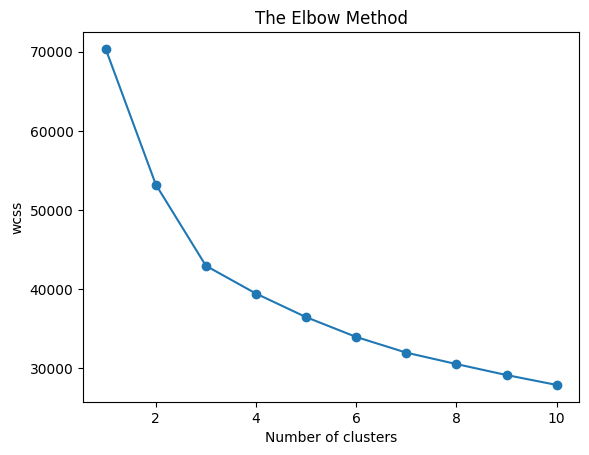

In [26]:
import matplotlib.pyplot as plt
plt.plot(range(1,11), css_reduced, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [27]:
# there should be 3 clusters asper the elbow method, hence hypothesis is approved
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(scaled_values)

KMeans(n_clusters=3, random_state=42)

In [28]:
clusters = kmeans.predict(scaled_values)

In [29]:
df = df.iloc[:, :-18]

In [30]:
df['furnish_type'] = clusters
# 0 - unfurnished
# 1 - semi-furnished
# 2 - furnished

In [31]:
df.drop(columns='furnishDetails', inplace=True)

In [32]:
# features column
temp_df =df[df['features'].isnull()]

In [33]:
df1['PropertyName'] =  df1['PropertyName'].str.lower()

In [34]:
df['features'].isnull().sum()

690

In [35]:
temp_df1 = temp_df.merge(df1, how ='left', left_on= 'society', right_on='PropertyName')['TopFacilities']

In [36]:
df.loc[temp_df.index, 'features']= temp_df1.values

In [37]:
df['features'].isnull().sum()

536

In [38]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [39]:
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 7,
    'Airy Rooms': 8,
    'Amphitheatre': 9,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [40]:
df['luxury_score'] = luxury_score

In [41]:
df.drop(columns=['features_list','society', 'address', 'features', 'nearbyLocations'], inplace=True)


In [42]:
df.head()

,F/H,sector,price,rate,area,areaWithType,bedRoom,bathroom,balcony,floorNum,agePossession,Pooja Room,Study Room,Servant Room,Others,Store Room,furnish_type,luxury_score
0,1,102,1.45,8787,1650,Super Built up area 1650(153.29 sq.m.),3,3,2,7.0,recent,0,0,1,0,0,2,169
1,0,3,0.70,7007,999,Plot area 111(92.81 sq.m.),2,3,1,1.0,recent,1,0,0,0,1,0,29
2,1,35,0.90,8035,1120,Super Built up area 1120(104.05 sq.m.),3,2,2,2.0,Under Construction,0,0,0,0,0,0,144
3,1,69,0.75,6818,1100,Built Up area: 1100 (102.19 sq.m.),2,2,2,4.0,moderately old,0,0,0,0,0,0,0
4,1,35,0.66,5181,1274,Super Built up area 1264(117.43 sq.m.)Carpet a...,2,2,3,12.0,recent,1,0,0,0,0,0,49


In [43]:
df.drop_duplicates(inplace=True)

In [44]:
correlation = df['rate'].corr(df['price'])

print(f"The correlation between area and price is: {correlation}")

The correlation between area and price is: 0.3830943875065071


In [45]:
# The areaWithType column has super builtup area, built up area, carpet area, and plot area
import re
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [46]:
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [47]:
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [48]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [49]:
df[['price','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3158,0.58,605,Carpet area: 605 (56.21 sq.m.),NaN,NaN,605.0
2827,0.42,1000,Carpet area: 1000 (92.9 sq.m.),NaN,NaN,1000.0
124,2.25,900,Plot area 100(83.61 sq.m.),NaN,NaN,NaN
2583,4.60,2700,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
469,2.34,2092,Super Built up area 2092(194.35 sq.m.)Built Up...,2092.0,1760.0,1670.0


In [50]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['areaWithType', 'built_up_area']]

In [51]:
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)


In [52]:
all_nan_df

,areaWithType,built_up_area
1,Plot area 111(92.81 sq.m.),111.00
14,Plot area 120(100.34 sq.m.),120.00
19,Plot area 530(49.24 sq.m.),530.00
24,Plot area 100(83.61 sq.m.),100.00
29,Plot area 4000(371.61 sq.m.),4000.00
...,...,...
3856,Plot area 270(225.75 sq.m.),270.00
3865,Plot area 204(170.57 sq.m.),204.00
3870,Plot area 520(434.79 sq.m.),520.00
3874,Plot area 1185.51(110.14 sq.m.),1185.51


In [53]:
df.drop(columns='areaWithType', inplace=True)

In [54]:
df.update(all_nan_df)

In [55]:
df['additional_room'] = (df['Pooja Room'] + df['Study Room'] + df['Servant Room'] + df['Others'] + df['Store Room'])

# EDA

In [56]:
df.shape

(3766, 21)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3766 entries, 0 to 3908
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   F/H                  3766 non-null   int64  
 1   sector               3761 non-null   object 
 2   price                3766 non-null   float64
 3   rate                 3766 non-null   int64  
 4   area                 3766 non-null   int64  
 5   bedRoom              3766 non-null   int64  
 6   bathroom             3766 non-null   int64  
 7   balcony              3766 non-null   int64  
 8   floorNum             3616 non-null   float64
 9   agePossession        3766 non-null   object 
 10  Pooja Room           3766 non-null   int16  
 11  Study Room           3766 non-null   int16  
 12  Servant Room         3766 non-null   int16  
 13  Others               3766 non-null   int16  
 14  Store Room           3766 non-null   int16  
 15  furnish_type         3766 non-null   int32 

In [58]:
df.isnull().sum()

F/H                       0
sector                    5
price                     0
rate                      0
area                      0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                150
agePossession             0
Pooja Room                0
Study Room                0
Servant Room              0
Others                    0
Store Room                0
furnish_type              0
luxury_score              0
super_built_up_area    1887
built_up_area          2003
carpet_area            1856
additional_room           0
dtype: int64

## sector

In [59]:
df[df['sector'].isnull()]

,F/H,sector,price,rate,area,bedRoom,bathroom,balcony,floorNum,agePossession,...,Study Room,Servant Room,Others,Store Room,furnish_type,luxury_score,super_built_up_area,built_up_area,carpet_area,additional_room
279,0,NaN,3.51,12342,2844,4,4,3,4.0,new,...,0,1,0,0,0,73,NaN,316.0,NaN,1
1734,0,NaN,8.25,30556,2700,5,6,3,3.0,moderately old,...,1,1,0,1,2,64,NaN,300.0,NaN,4
1964,0,NaN,15.50,28233,5490,5,6,3,3.0,moderately old,...,1,1,0,1,0,76,NaN,610.0,NaN,4
2661,0,NaN,5.50,38194,1440,18,18,3,4.0,recent,...,0,1,0,0,1,70,NaN,160.0,NaN,1
3565,0,NaN,8.49,31444,2700,3,3,2,4.0,recent,...,0,1,0,0,2,21,NaN,300.0,NaN,2


In [60]:
df = df[df['sector'] != 'Sector']

In [61]:
df['sector'].value_counts().shape[0]

124

In [62]:
df['sector'].unique()

array(['102', '3', '35', '69', '107', '11', '86', '99A', '72', '110',
       '93', '43', '108', '84', '10', '70', '81', '12', '54', '66', '104',
       '48', '8', '77', '49', '82', '91', '106', '37C', '109', '12A',
       '17B', '61', '89', '13', '28', '79', '50', '26', '74', '52', '111',
       '112', '4', '67', '14', '32', '65', '95', '15', '7', '68', '1',
       '33', '23', '85', '63A', '3A', '37D', '40', '6', '95A', '70A',
       '56', '47', '9', '90', '83', '92', '67A', '1A', '51', '24', '38',
       '113', '103', '36A', '29', '105', '71', '41', '25', '57', '82A',
       '80', '2', '99', '59', '5', nan, '22', '30', '36', '17C', '62',
       '60', '73', '78', '110A', '76', '88A', '63', '9A', '55', '53',
       '37', '21', '58', '17', '45', '31', '46', '7,', '89A', '39', '17A',
       '37B', '10A', '23A', '27', '37A', '88B', '21A', '42', '9B'],
      dtype=object)

In [63]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<Axes: xlabel='sector'>

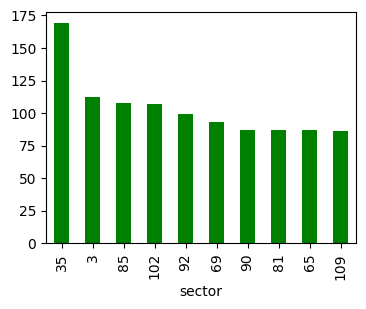

In [64]:
df['sector'].value_counts().head(10).plot(kind='bar', color='green', figsize = (4,3))

## price

In [65]:
df['price'].value_counts()

price
1.25    81
1.10    66
1.50    65
0.90    64
1.20    64
        ..
5.35     1
4.12     1
8.48     1
2.41     1
3.83     1
Name: count, Length: 475, dtype: int64

In [66]:
df['price'].describe()

count    3765.000000
mean        2.507904
std         2.961567
min         0.070000
25%         0.920000
50%         1.500000
75%         2.700000
max        31.500000
Name: price, dtype: float64

In [67]:
df = df[df['price'] > 0.1]

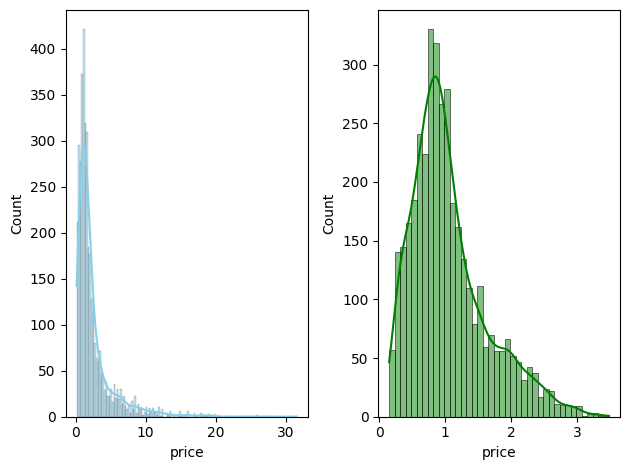

In [68]:
plt.subplot(1,2,1)
sns.histplot((df['price']), kde=True, color='skyblue')

plt.subplot(1,2,2)
sns.histplot(np.log1p(df['price']), kde=True, color='green')

plt.tight_layout()
plt.show()

In [69]:
df['price'].skew()
df['price'].kurtosis()

15.126199007491163

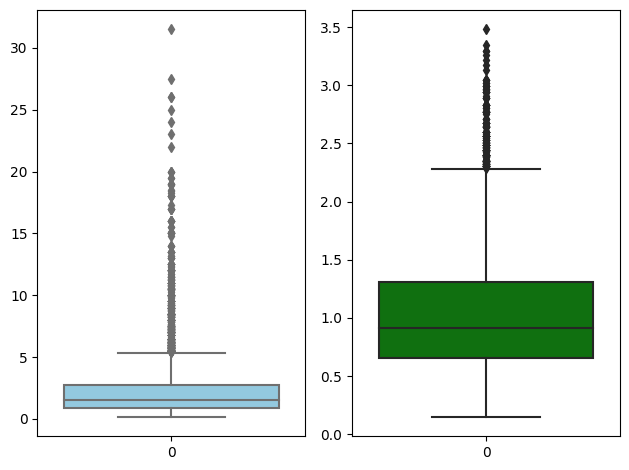

In [70]:
plt.subplot(1,2,1)
sns.boxplot(df['price'], color='skyblue')

plt.subplot(1,2,2)
sns.boxplot(np.log1p(df['price']),color='green')

plt.tight_layout()
plt.show()

In [71]:
outliers_price =  df[df['price'] > 5.45]
outliers_price['price'].describe()

count    431.000000
mean       9.218422
std        4.065229
min        5.460000
25%        6.420000
50%        8.000000
75%       10.655000
max       31.500000
Name: price, dtype: float64

## rate

In [72]:
df['rate'].describe()

count      3764.000000
mean      14074.404888
std       23484.197860
min           2.000000
25%        6812.750000
50%        9011.000000
75%       13889.000000
max      600000.000000
Name: rate, dtype: float64

In [73]:
df[df['rate'] == 600000]

,F/H,sector,price,rate,area,bedRoom,bathroom,balcony,floorNum,agePossession,...,Study Room,Servant Room,Others,Store Room,furnish_type,luxury_score,super_built_up_area,built_up_area,carpet_area,additional_room
2995,0,54,24.0,600000,400,5,5,2,1.0,old,...,1,1,0,0,2,122,NaN,400.0,NaN,3


<Axes: >

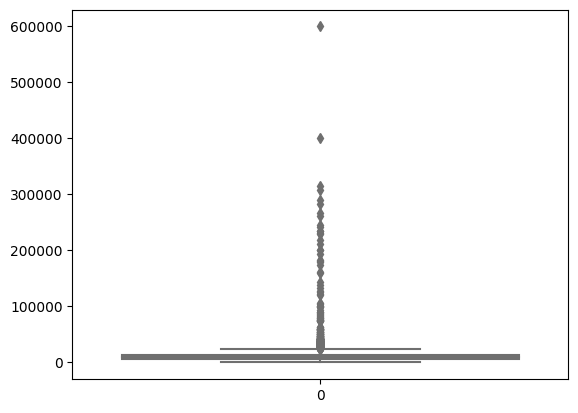

In [74]:
sns.boxplot(df['rate'], color='skyblue')

<Axes: xlabel='rate', ylabel='Count'>

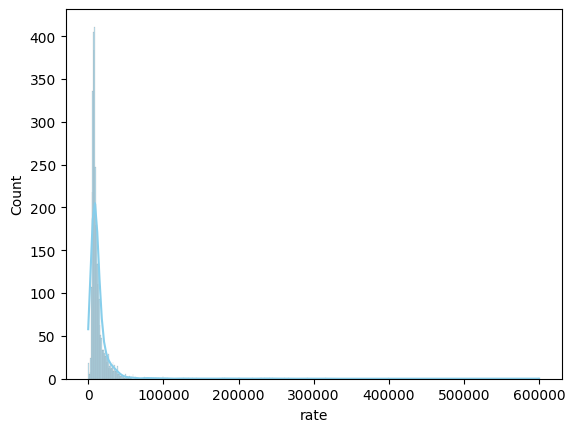

In [75]:
sns.histplot(df['rate'], kde=True, color='skyblue')


In [76]:
skew = df['rate'].skew()
kurtosis = df['rate'].kurt()
print(skew, kurtosis)

10.9373960234016 174.00314101199814


In [77]:
df.sample(1)

,F/H,sector,price,rate,area,bedRoom,bathroom,balcony,floorNum,agePossession,...,Study Room,Servant Room,Others,Store Room,furnish_type,luxury_score,super_built_up_area,built_up_area,carpet_area,additional_room
511,1,3,1.25,8656,1444,2,2,3,14.0,Under Construction,...,0,0,0,0,0,36,1444.0,NaN,913.0,0


## bedroom

In [78]:
df['bedRoom'].describe()

count    3764.000000
mean        3.375930
std         2.022138
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        36.000000
Name: bedRoom, dtype: float64

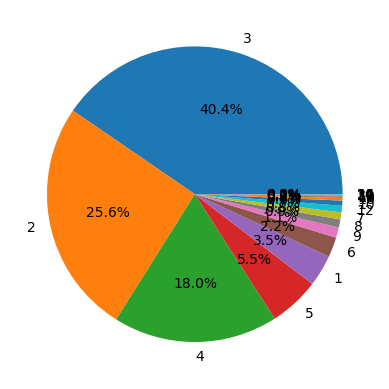

In [79]:
plt.pie(df['bedRoom'].value_counts(), labels=df['bedRoom'].value_counts().index, autopct='%1.1f%%')
plt.show()

<Axes: >

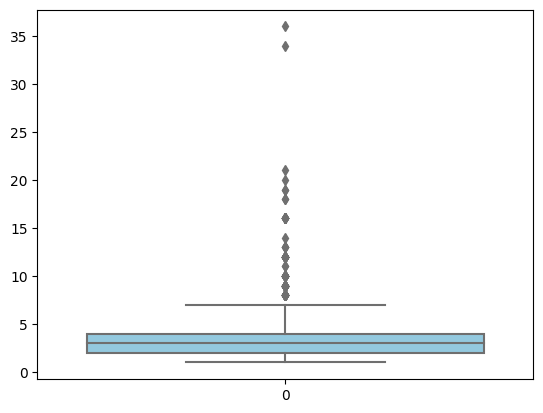

In [80]:
sns.boxplot(df['bedRoom'], color='skyblue')

## bathRoom

In [81]:
df['bathroom'].describe()

count    3764.000000
mean        3.421626
std         2.060336
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        36.000000
Name: bathroom, dtype: float64

In [82]:
df['bathroom'].value_counts(normalize=True).head(6).cumsum()

bathroom
3    0.293571
2    0.581031
4    0.801275
5    0.879384
1    0.923220
6    0.955101
Name: proportion, dtype: float64

<Axes: >

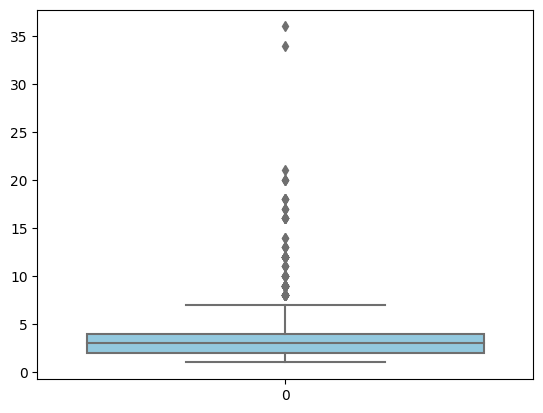

In [83]:
sns.boxplot(df['bathroom'], color='skyblue')

## balcony

In [84]:
df['balcony'].unique()

array([2, 1, 3, 0])

In [85]:
df['balcony'].describe()

count    3764.000000
mean        2.391073
std         0.871850
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: balcony, dtype: float64

## floorNum

In [86]:
df['floorNum'].describe()

count    3614.000000
mean        6.937189
std         5.974175
min         0.000000
25%         3.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum', ylabel='Count'>

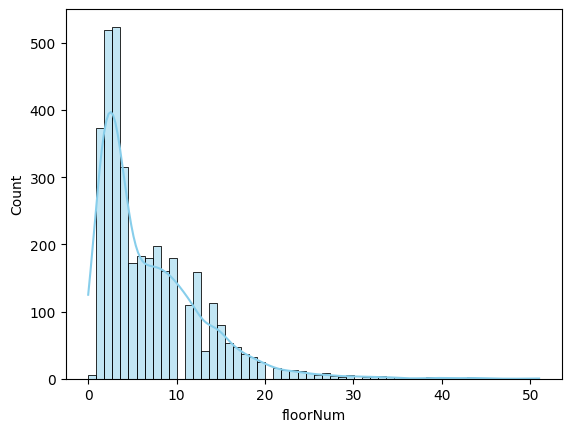

In [87]:
sns.histplot((df['floorNum']), kde=True, color='skyblue')

<Axes: >

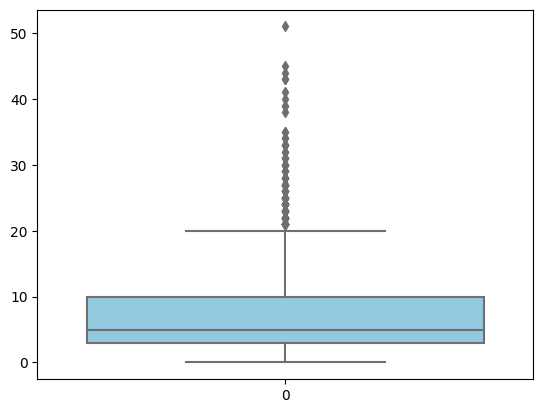

In [88]:
sns.boxplot(df['floorNum'], color='skyblue')

In [89]:
df.loc[(df['floorNum'] > 10) & (df['F/H'] == 0), 'F/H'] = 1

In [90]:
df[df['floorNum'] == 51]

,F/H,sector,price,rate,area,bedRoom,bathroom,balcony,floorNum,agePossession,...,Study Room,Servant Room,Others,Store Room,furnish_type,luxury_score,super_built_up_area,built_up_area,carpet_area,additional_room
1889,1,67,8.0,22222,3600,6,7,3,51.0,moderately old,...,1,1,0,0,2,49,NaN,400.0,NaN,3


## agePossession

In [91]:
df['agePossession'].describe()

count       3764
unique         6
top       recent
freq        1653
Name: agePossession, dtype: object

In [92]:
df['agePossession'].value_counts()

agePossession
recent                1653
new                    602
moderately old         583
Undefined              410
old                    337
Under Construction     179
Name: count, dtype: int64

In [93]:
df.shape

(3764, 21)

## multivariate analysis

### F/H

<Axes: xlabel='F/H', ylabel='price'>

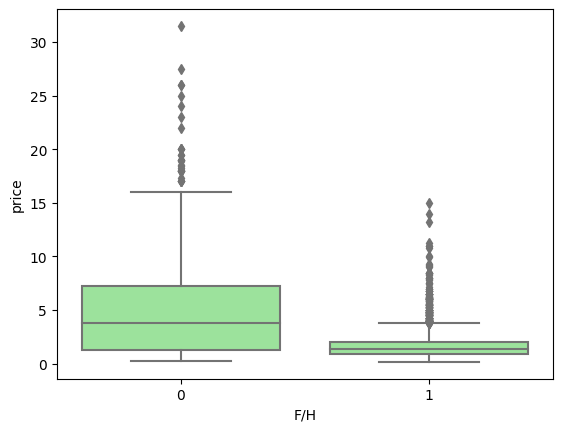

In [94]:
sns.boxplot(x=df['F/H'], y=df['price'], color='lightgreen')

In [95]:
df = df.loc[(df['F/H'] == 0) & (df['rate'] < 350000) | (df['F/H'] == 1) & (df['rate'] < 150000)]

<Axes: xlabel='F/H', ylabel='rate'>

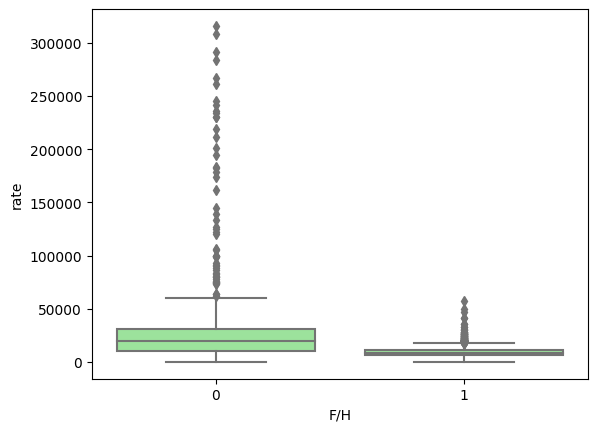

In [96]:
sns.boxplot(x=df['F/H'], y=df['rate'], color='lightgreen')

In [97]:
df = df.loc[(df['F/H'] == 0) & (df['bedRoom'] < 30) | (df['F/H'] == 1) & (df['bedRoom'] < 20)]

<Axes: xlabel='F/H', ylabel='bedRoom'>

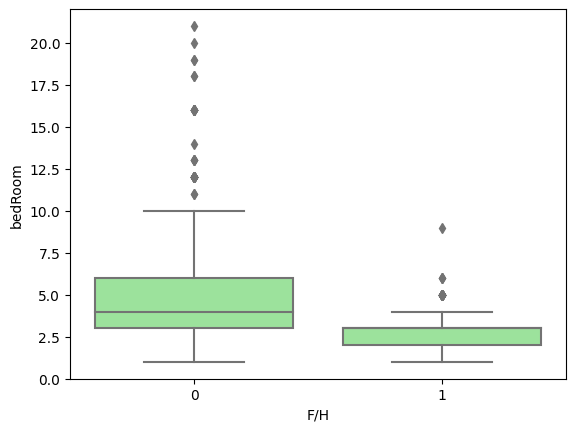

In [98]:
sns.boxplot(x=df['F/H'],y=df['bedRoom'], color='lightgreen')

In [99]:
df.shape

(3758, 21)

In [100]:
df.sample()

,F/H,sector,price,rate,area,bedRoom,bathroom,balcony,floorNum,agePossession,...,Study Room,Servant Room,Others,Store Room,furnish_type,luxury_score,super_built_up_area,built_up_area,carpet_area,additional_room
2923,1,48,6.25,24300,2572,3,5,3,5.0,moderately old,...,0,1,0,0,2,49,NaN,NaN,2880.0,1


<Axes: xlabel='F/H', ylabel='bathroom'>

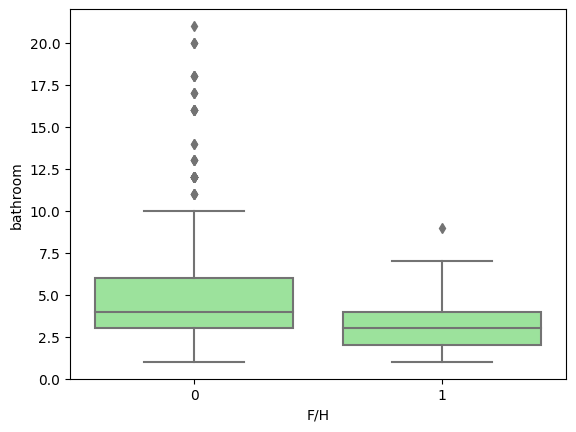

In [101]:
sns.boxplot(x=df['F/H'],y=df['bathroom'], color='lightgreen')

In [102]:
df = df[(df['built_up_area'] < 400000) | (df['built_up_area'].isnull())]

In [103]:
df = df[(df['built_up_area'] < 20000) | (df['built_up_area'].isnull())]

<Axes: xlabel='F/H', ylabel='built_up_area'>

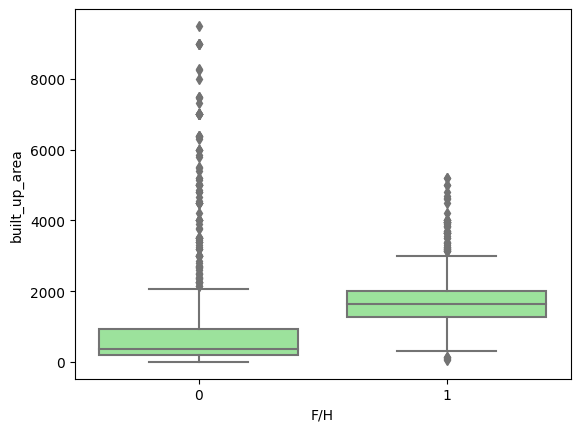

In [104]:
sns.boxplot(x=df['F/H'],y=df['built_up_area'], color='lightgreen')

In [105]:
df['carpet_area'].isnull().sum()

1847

In [106]:
df = df[(df['carpet_area'] < 400000) | (df['carpet_area'].isnull())]

<Axes: xlabel='F/H', ylabel='carpet_area'>

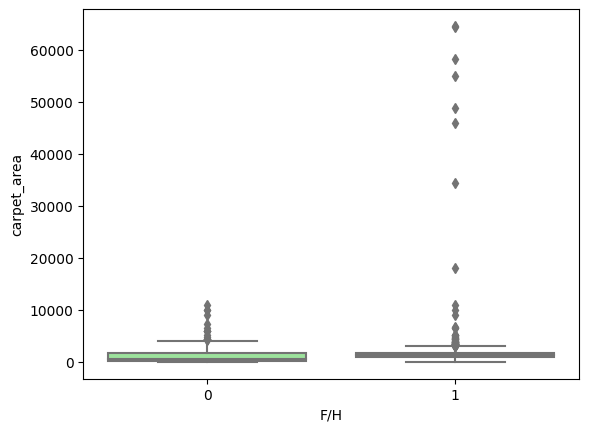

In [107]:
sns.boxplot(x=df['F/H'],y=df['carpet_area'], color='lightgreen')

<Axes: xlabel='agePossession', ylabel='F/H'>

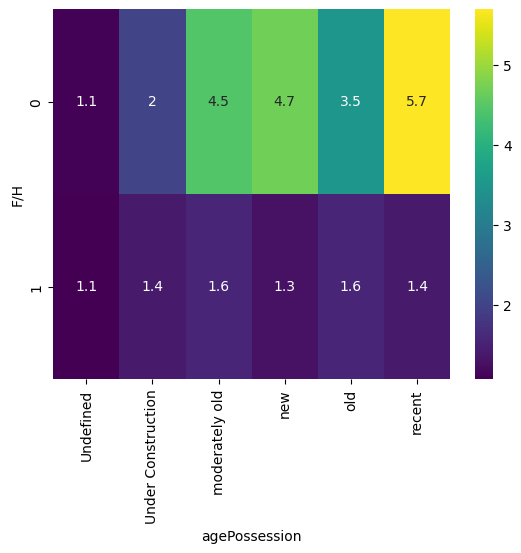

In [108]:
sns.heatmap(pd.pivot_table(df, index='F/H', columns='agePossession', values='price', aggfunc='median'), annot=True, cmap='viridis')

<Axes: xlabel='furnish_type', ylabel='F/H'>

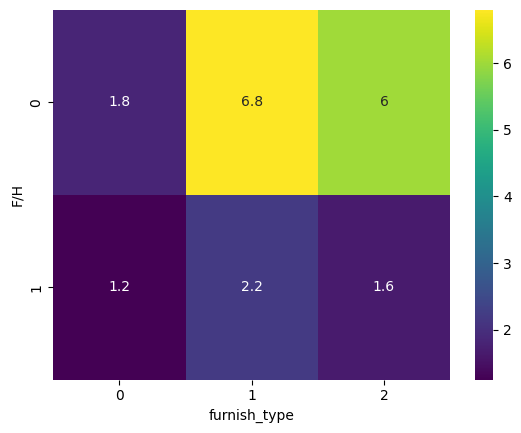

In [109]:
sns.heatmap(pd.pivot_table(df, index='F/H', columns='furnish_type', values='price', aggfunc='median'), annot=True, cmap='viridis')

<Axes: xlabel='super_built_up_area', ylabel='F/H'>

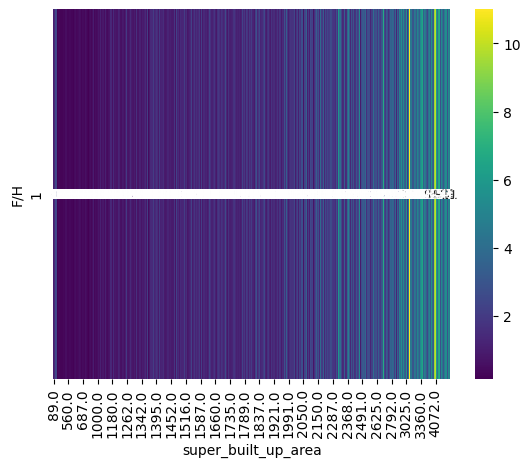

In [110]:
sns.heatmap(pd.pivot_table(df, index='F/H', columns='super_built_up_area', values='price', aggfunc='median'), annot=True, cmap='viridis')

<Axes: xlabel='additional_room', ylabel='F/H'>

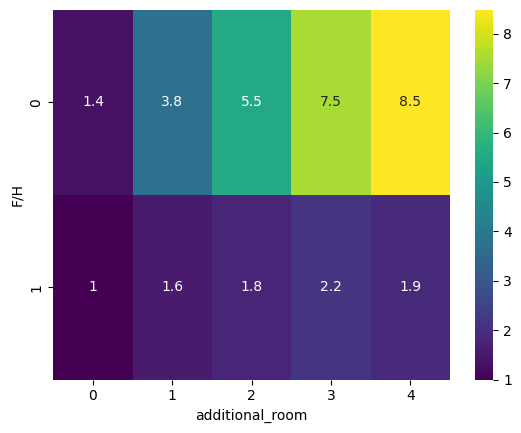

In [111]:
sns.heatmap(pd.pivot_table(df, index='F/H', columns='additional_room', values='price', aggfunc='median'), annot=True, cmap='viridis')

In [112]:
prices_by_sector = df.groupby('sector')['price'].median().sort_values(ascending=False).reset_index()


In [113]:
luxury_by_sector = df.groupby('sector')['luxury_score'].median().sort_values(ascending=False).reset_index()

In [114]:
def extract_sector_number(sector_string):
    if pd.isna(sector_string):  # Handle missing values
        return None
    match = re.search(r'(\d+)', str(sector_string))  # Find the first sequence of digits
    if match:
        return int(match.group(1))
    else:
        return None

# Apply the function to the 'sector' column and create a new 'sector_number' column
df['sector'] = df['sector'].apply(extract_sector_number)

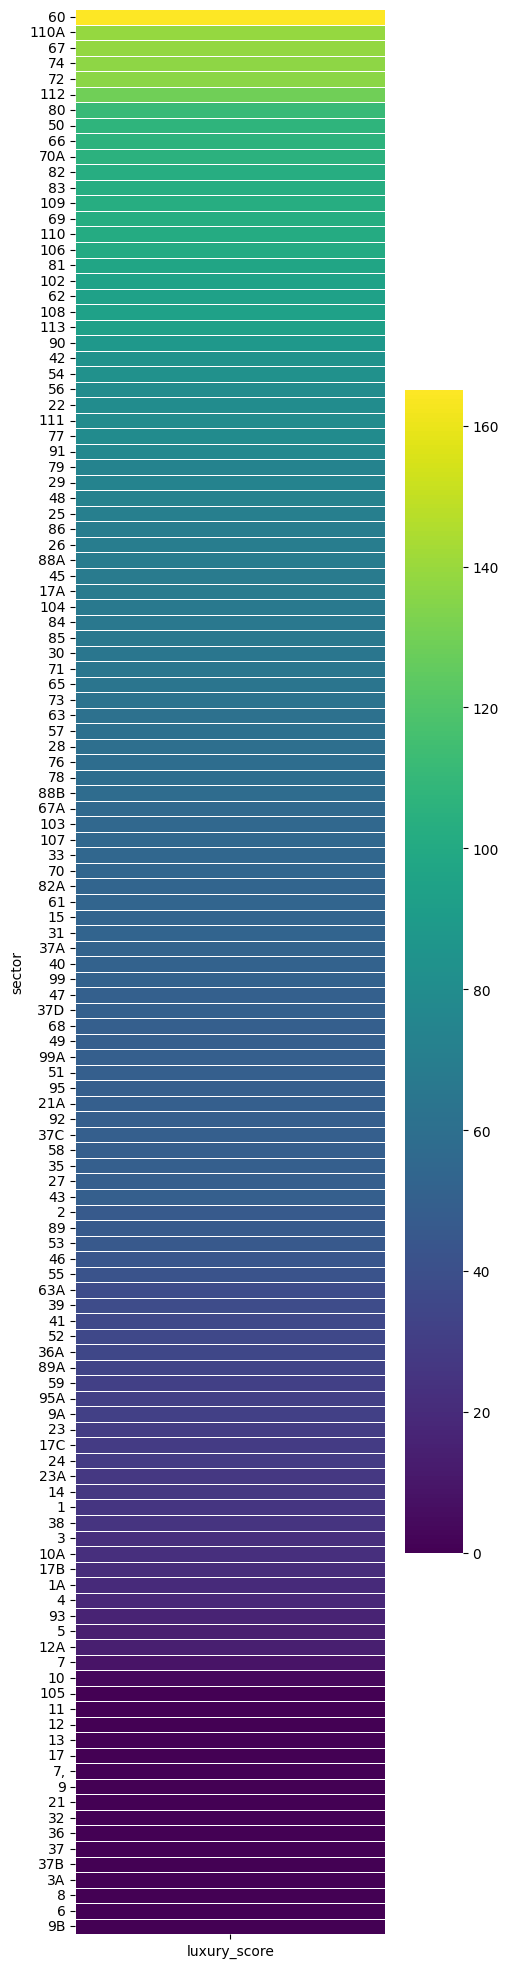

In [115]:
plt.figure(figsize=(5,25))
sns.heatmap(luxury_by_sector.set_index('sector')[['luxury_score']], fmt=".2f", linewidths=0.5, cmap='viridis')
plt.show()

In [116]:
df.sample()

,F/H,sector,price,rate,area,bedRoom,bathroom,balcony,floorNum,agePossession,...,Study Room,Servant Room,Others,Store Room,furnish_type,luxury_score,super_built_up_area,built_up_area,carpet_area,additional_room
1072,1,81.0,0.89,8279,1075,2,2,2,3.0,Under Construction,...,0,0,1,0,0,20,NaN,NaN,1075.0,1


<Axes: >

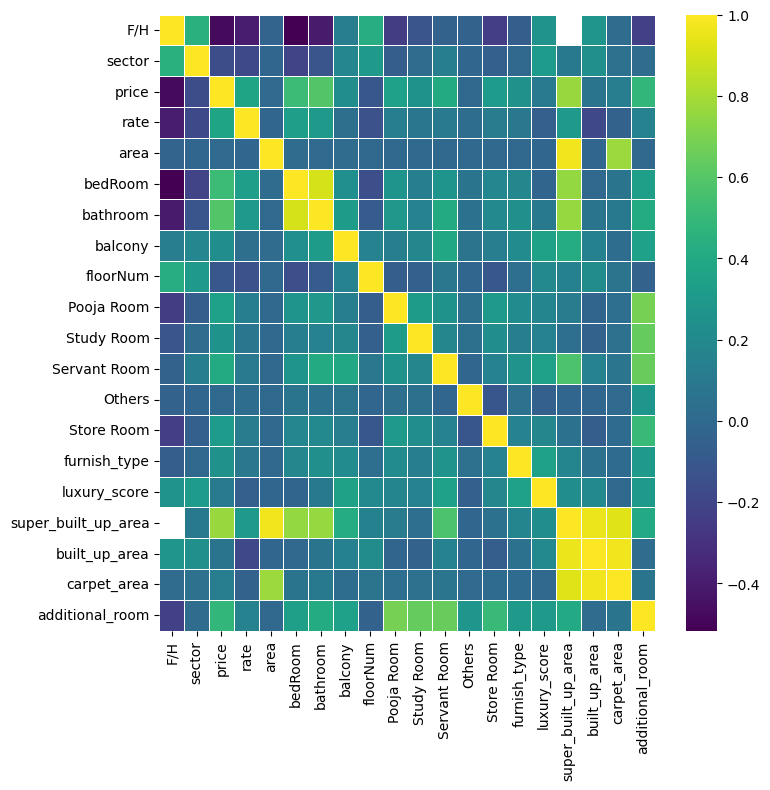

In [117]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True), cmap='viridis', linewidths=0.4)

In [118]:
df.corr(numeric_only=True)['price'].sort_values(ascending=False)

price                  1.000000
super_built_up_area    0.763961
bathroom               0.588411
bedRoom                0.515198
additional_room        0.483905
Servant Room           0.404827
rate                   0.372023
Pooja Room             0.338124
Store Room             0.310693
Study Room             0.256377
furnish_type           0.243123
balcony                0.227810
carpet_area            0.121978
luxury_score           0.103485
built_up_area          0.067443
area                   0.002621
Others                -0.006133
floorNum              -0.106645
sector                -0.162380
F/H                   -0.480620
Name: price, dtype: float64

# Outlier detection and removal

In [119]:
# Q1 - 1.5*IQR > outliers > Q3 + 1.5*IQR
df['rate'].describe()

count      3753.000000
mean      13747.958966
std       20165.791470
min           2.000000
25%        6818.000000
50%        9011.000000
75%       13889.000000
max      315789.000000
Name: rate, dtype: float64

In [120]:
df[df['rate'] < 1000]

,F/H,sector,price,rate,area,bedRoom,bathroom,balcony,floorNum,agePossession,...,Study Room,Servant Room,Others,Store Room,furnish_type,luxury_score,super_built_up_area,built_up_area,carpet_area,additional_room
400,1,95.0,0.38,58,65517,3,2,1,12.0,recent,...,0,0,0,0,0,51,NaN,NaN,64412.0,0
781,1,95.0,0.38,58,65517,2,2,2,10.0,new,...,1,0,0,0,0,15,NaN,NaN,64529.0,1
1242,1,86.0,0.46,79,58228,2,2,1,NaN,Undefined,...,0,0,0,0,0,15,NaN,NaN,58141.0,0
2402,1,95.0,0.21,61,34426,1,1,1,13.0,recent,...,0,0,0,0,0,68,NaN,NaN,34401.0,0
2426,1,95.0,0.33,60,55000,2,2,1,13.0,recent,...,0,0,0,0,0,37,NaN,NaN,54917.0,0
2614,1,95.0,0.24,53,45283,2,2,1,10.0,recent,...,0,0,1,0,0,33,NaN,NaN,45966.0,1
3054,0,13.0,1.25,151,82781,10,6,2,3.0,old,...,0,0,1,0,0,7,NaN,115.0,NaN,1
3274,0,3.0,0.85,630,13492,3,3,1,1.0,recent,...,0,0,1,0,0,0,NaN,1500.0,NaN,1
3516,1,35.0,0.28,57,49123,1,1,2,1.0,recent,...,1,0,0,0,0,37,NaN,NaN,48811.0,1
3560,0,37.0,1.45,2,7250000,4,3,3,3.0,moderately old,...,0,0,0,0,0,0,NaN,200.0,NaN,0


In [121]:
df[df['rate'] > 24496]['rate'].describe()

count       366.000000
mean      50689.177596
std       49828.075684
min       24500.000000
25%       28241.250000
50%       33808.000000
75%       42855.000000
max      315789.000000
Name: rate, dtype: float64

In [122]:
df[df['rate'] > 24496].to_excel('outliers.xlsx')

In [123]:
df['area'].describe()

count    3.753000e+03
mean     4.068711e+03
std      1.184173e+05
min      4.500000e+01
25%      1.200000e+03
50%      1.720000e+03
75%      2.295000e+03
max      7.250000e+06
Name: area, dtype: float64

<Axes: >

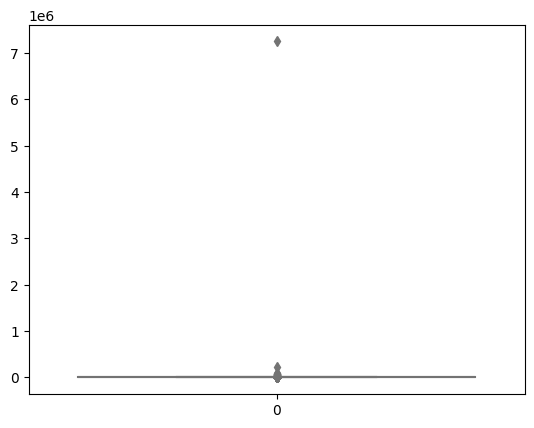

In [124]:
sns.boxplot(df['area'], color='lightgreen')

In [125]:
df = df[df['area'] < 200000]

In [126]:
df['area'] = df['area'].apply(lambda x:x*9 if x<1000 else x )

In [127]:
df['rate'] = round(df['price']*10000000/df['area'])

<Axes: >

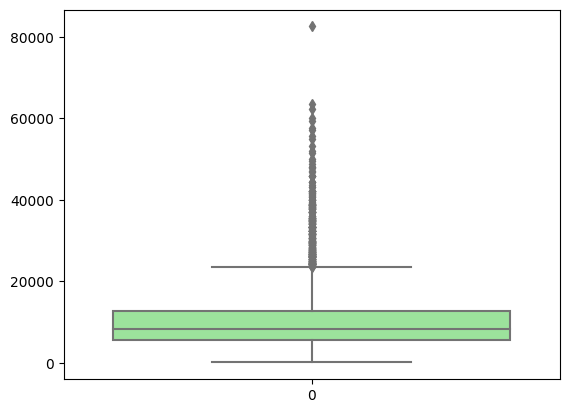

In [128]:
sns.boxplot(df['rate'], color='lightgreen')

In [129]:
df = df[df['rate'] < 50000]

<Axes: >

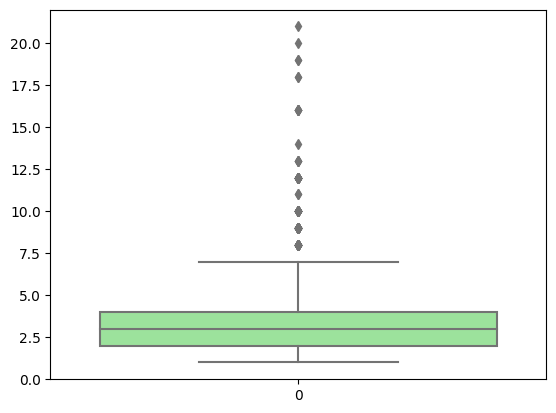

In [130]:
sns.boxplot(df['bedRoom'], color='lightgreen')

In [131]:
df = df[df['bedRoom'] < 10]
df = df[df['bathroom'] < 10]

In [132]:
df['floorNum'].fillna(df['floorNum'].median(), inplace=True)

In [133]:
df.corr(numeric_only=True)['price'].sort_values(ascending=False)

price                  1.000000
rate                   0.794590
super_built_up_area    0.763961
bathroom               0.602925
bedRoom                0.524520
additional_room        0.476245
Servant Room           0.402922
Pooja Room             0.322454
Store Room             0.315682
Study Room             0.244246
balcony                0.224250
furnish_type           0.223973
carpet_area            0.134826
luxury_score           0.111193
area                   0.109558
built_up_area          0.085948
Others                -0.017339
floorNum              -0.086431
sector                -0.142784
F/H                   -0.460640
Name: price, dtype: float64

In [134]:
house_df = df[df['F/H'] == 0]

In [135]:
import math
house_df['bedRoom'] = np.ceil(house_df['bedRoom'] / house_df['floorNum'])

In [136]:
house_df['bathroom'] = np.ceil(house_df['bathroom'] / house_df['floorNum'])

In [137]:
temp = df[df['area'] > 20000]

In [138]:
temp['area'] = round(temp['area']/9)

In [139]:
df.update(temp)

In [140]:
temp1 = df[(df['area'] < 3000) & (df['area'] > 2000)]

In [141]:
np.percentile(temp1['area'] / temp1['bathroom'], 2)

315.86

In [142]:
np.percentile(temp1['area'] / temp1['bedRoom'], 2)

300.0

In [143]:
df[(df['area'] / df['bedRoom']) < 300]

,F/H,sector,price,rate,area,bedRoom,bathroom,balcony,floorNum,agePossession,...,Study Room,Servant Room,Others,Store Room,furnish_type,luxury_score,super_built_up_area,built_up_area,carpet_area,additional_room
6,0,11.0,0.95,7308.0,1300,5,3,0,1.0,Undefined,...,0,0,0,0,0,0,NaN,1300.00,NaN,0
91,0,3.0,0.67,9795.0,684,3,3,2,2.0,recent,...,0,0,1,0,0,7,NaN,76.00,NaN,1
93,0,12.0,1.72,11111.0,1548,6,3,1,2.0,old,...,0,0,1,0,0,0,NaN,172.00,171.0,1
97,0,40.0,5.00,21124.0,2367,9,9,3,3.0,recent,...,0,0,0,0,2,66,NaN,263.00,NaN,1
140,0,38.0,4.30,28782.0,1494,9,9,3,3.0,recent,...,0,0,1,0,2,41,NaN,165.00,164.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3703,0,3.0,0.75,15432.0,486,2,1,0,1.0,old,...,0,0,0,0,0,0,NaN,54.00,NaN,0
3829,0,24.0,3.50,32407.0,1080,5,4,3,3.0,old,...,0,0,0,0,0,15,NaN,120.00,NaN,0
3865,0,46.0,4.35,23693.0,1836,8,8,2,3.0,recent,...,1,0,0,0,2,19,NaN,204.00,NaN,2
3874,0,105.0,1.20,10118.0,1186,6,2,1,2.0,old,...,0,0,0,0,0,9,NaN,1185.51,NaN,0


In [144]:
df[(df['area'] / df['bedRoom']) < 300] = df[(df['area'] / df['bedRoom']) < 300][df[(df['area'] / df['bedRoom']) < 300]['floorNum'] != 1.0]

In [145]:
df[(df['area'] / df['bathroom']) < 316] = df[(df['area'] / df['bathroom']) < 316][df[(df['area'] / df['bathroom']) < 316]['floorNum'] != 1.0]

In [146]:
df['rate'] = df['price']*10000000 / df['area']

# Missing value imputation

In [147]:
df.dropna(subset=['rate'], inplace=True)

In [148]:
df.isnull().sum()

F/H                       0
sector                    4
price                     0
rate                      0
area                      0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                  0
agePossession             0
Pooja Room                0
Study Room                0
Servant Room              0
Others                    0
Store Room                0
furnish_type              0
luxury_score              0
super_built_up_area    1774
built_up_area          1992
carpet_area            1767
additional_room           0
dtype: int64

In [149]:
df.shape

(3653, 21)

In [150]:
df.dropna(subset='sector', inplace=True)

In [151]:
temp3 = df[~(df['super_built_up_area'].isnull()) & ~(df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [152]:
(temp3['super_built_up_area'] / temp3['built_up_area']).median()

1.1063815789473685

In [153]:
temp4 = df[(df['super_built_up_area'].isnull()) & ~(df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [154]:
temp4['super_built_up_area'].fillna(round(((temp4['built_up_area'] * 1.1064) + (temp4['carpet_area'] * 1.27))/2), inplace=True)

In [155]:
temp5 = df[(df['super_built_up_area'].isnull()) & ~(df['carpet_area'].isnull()) & (df['built_up_area'].isnull())]

In [156]:
temp5['super_built_up_area'].fillna(round(temp5['carpet_area'] * 1.27), inplace=True)

In [157]:
temp6 = df[(df['super_built_up_area'].isnull()) & ~(df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [158]:
temp6['super_built_up_area'].fillna(round(temp6['built_up_area'] * 1.14256), inplace=True)

In [159]:
df.update(temp4)
df.update(temp5)
df.update(temp6)

In [160]:
df = df[df['super_built_up_area'] < 40000]

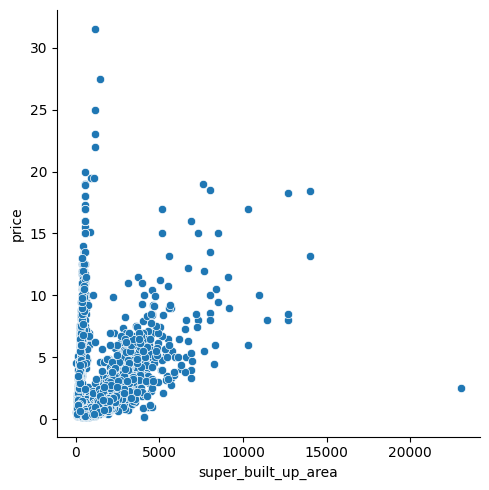

In [161]:
sns.relplot(data = df, x = 'super_built_up_area', y = 'price', kind='scatter')

In [162]:
# removes the points that show different slope
disturbance_df = df[(df['super_built_up_area'] < 1750) & (df['price'] > 2.8)]

In [163]:
disturbance_df['super_built_up_area'] = disturbance_df['area']

In [164]:
df.update(disturbance_df)

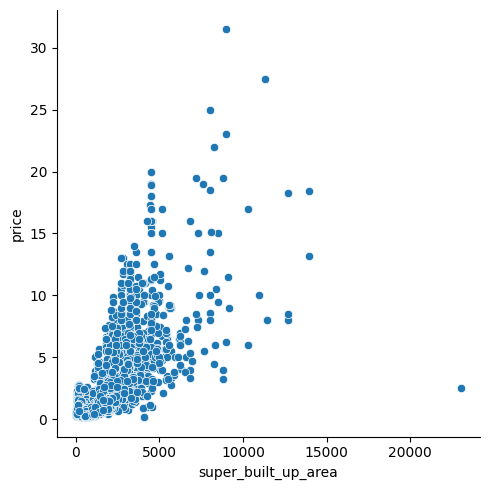

In [165]:
sns.relplot(data = df, x = 'super_built_up_area', y = 'price', kind='scatter')

In [166]:
df['super_built_up_area'].corr(df['price'])

0.6820089957086577

In [167]:
df.isnull().sum()

F/H                       0
sector                    0
price                     0
rate                      0
area                      0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                  0
agePossession             0
Pooja Room                0
Study Room                0
Servant Room              0
Others                    0
Store Room                0
furnish_type              0
luxury_score              0
super_built_up_area       0
built_up_area          1985
carpet_area            1763
additional_room           0
dtype: int64

In [168]:
def fill_udf(row):
  if row['agePossession'] == 'Undefined':
    mode_value = df[(df['sector'] == row['sector']) & (df['F/H'] == row['F/H'])]['agePossession'].mode()[0]
    if not mode_value == 'Undefined':
      return mode_value
    else:
      return 'Undefined'
  else:
    return row['agePossession']

In [169]:
df['agePossession'] = df.apply(fill_udf, axis=1)

In [170]:
df['agePossession'].value_counts()

agePossession
recent                1779
new                    628
moderately old         624
old                    352
Under Construction     195
Undefined               64
Name: count, dtype: int64

In [171]:
def fill_udf1(row):
  if row['agePossession'] == 'Undefined':
    mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()[0]
    if not mode_value == 'Undefined':
      return mode_value
    else:
      return 'Undefined'
  else:
    return row['agePossession']

In [172]:
df['agePossession'] = df.apply(fill_udf1, axis=1)

In [173]:
def fill_udf2(row):
  if row['agePossession'] == 'Undefined':
    mode_value = df[(df['F/H'] == row['F/H'])]['agePossession'].mode()[0]
    if not mode_value == 'Undefined':
      return mode_value
    else:
      return 'Undefined'
  else:
    return row['agePossession']
df['agePossession'] = df.apply(fill_udf2, axis=1)

In [174]:
df.drop(columns=['built_up_area', 'carpet_area'], inplace=True)

<Axes: >

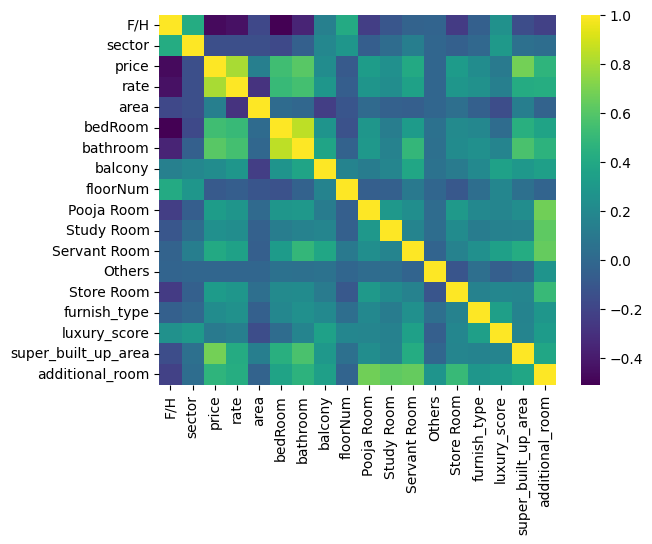

In [175]:
sns.heatmap(df.corr(numeric_only=True), cmap='viridis')

In [176]:
# we can keep this, but the user wouldn't have a specific rate while buying a house
train_df = df.drop(columns='rate')

In [177]:
train_df.head()

,F/H,sector,price,area,bedRoom,bathroom,balcony,floorNum,agePossession,Pooja Room,Study Room,Servant Room,Others,Store Room,furnish_type,luxury_score,super_built_up_area,additional_room
0,1.0,102.0,1.45,1650.0,3.0,3.0,2.0,7.0,recent,0.0,0.0,1.0,0.0,0.0,2.0,169.0,1650.0,1.0
1,0.0,3.0,0.70,8991.0,2.0,3.0,1.0,1.0,recent,1.0,0.0,0.0,0.0,1.0,0.0,29.0,127.0,2.0
2,1.0,35.0,0.90,1120.0,3.0,2.0,2.0,2.0,Under Construction,0.0,0.0,0.0,0.0,0.0,0.0,144.0,1120.0,0.0
3,1.0,69.0,0.75,1100.0,2.0,2.0,2.0,4.0,moderately old,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1257.0,0.0
4,1.0,35.0,0.66,1274.0,2.0,2.0,3.0,12.0,recent,1.0,0.0,0.0,0.0,0.0,0.0,49.0,1264.0,1.0


# Feature selection and Feature Engg


- floorNum - high rise, low rise, medium rise
- luxury score - high, med, low

In [178]:
train_df['floorNum'].describe()

count    3642.000000
mean        6.962932
std         5.889535
min         0.000000
25%         3.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

In [179]:
train_df['floorNum'].unique()

array([ 7.,  1.,  2.,  4., 12.,  3., 11., 10., 15., 14.,  5.,  6.,  9.,
       24., 18., 16., 19., 13.,  8., 26., 28., 20., 22., 35., 23., 21.,
       17., 40., 27., 30.,  0., 34., 31., 25., 45., 38., 32., 44., 29.,
       33., 51., 39., 43.])

In [180]:
def floortype(value):
  if 0 <= value < 5:
    return 'low rise'
  elif 5<= value < 10:
    return 'medium rise'
  else:
    return 'high rise'

In [181]:
train_df['floortype'] = train_df['floorNum'].apply(floortype)

In [182]:
train_df.drop(columns='floorNum', inplace=True)

In [183]:
def luxury_type(value):
  if 0 <= value < 30:
    return 'low'
  elif 30 <= value < 60:
    return 'medium'
  else:
    return 'high'

In [184]:
train_df['luxury_type'] = train_df['luxury_score'].apply(luxury_type)

In [185]:
train_df.drop(columns='luxury_score', inplace=True)

In [186]:
from sklearn.preprocessing import OrdinalEncoder

df_encoded = train_df.copy()
cat_cols = ['agePossession', 'floortype', 'luxury_type']

for cols in cat_cols:
  encoder = OrdinalEncoder()
  df_encoded[cols] = encoder.fit_transform(df_encoded[[cols]])
  print(encoder.categories_)

x_label = df_encoded.drop(columns='price')
y_label = df_encoded['price']


[array(['Under Construction', 'moderately old', 'new', 'old', 'recent'],
      dtype=object)]
[array(['high rise', 'low rise', 'medium rise'], dtype=object)]
[array(['high', 'low', 'medium'], dtype=object)]


In [187]:
x_label.head()

,F/H,sector,area,bedRoom,bathroom,balcony,agePossession,Pooja Room,Study Room,Servant Room,Others,Store Room,furnish_type,super_built_up_area,additional_room,floortype,luxury_type
0,1.0,102.0,1650.0,3.0,3.0,2.0,4.0,0.0,0.0,1.0,0.0,0.0,2.0,1650.0,1.0,2.0,0.0
1,0.0,3.0,8991.0,2.0,3.0,1.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,127.0,2.0,1.0,1.0
2,1.0,35.0,1120.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1120.0,0.0,1.0,0.0
3,1.0,69.0,1100.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1257.0,0.0,1.0,1.0
4,1.0,35.0,1274.0,2.0,2.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1264.0,1.0,0.0,2.0


In [188]:
from  sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(x_label, y_label)

f1 = pd.DataFrame({
    'feature': x_label.columns,
    'rf_importance': regressor.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

f1

,feature,rf_importance
13,super_built_up_area,0.534506
0,F/H,0.139990
1,sector,0.101158
2,area,0.088010
4,bathroom,0.033204
3,bedRoom,0.024330
9,Servant Room,0.018629
14,additional_room,0.016059
6,agePossession,0.011565
16,luxury_type,0.006937


In [189]:
from sklearn.ensemble import GradientBoostingRegressor

gb_label = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_label.fit(x_label, y_label)

f2 = pd.DataFrame({
    'feature': x_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)
f2

,feature,gb_importance
13,super_built_up_area,0.568841
0,F/H,0.139938
1,sector,0.109576
4,bathroom,0.053434
2,area,0.052647
9,Servant Room,0.025960
3,bedRoom,0.023218
14,additional_room,0.019795
6,agePossession,0.002360
5,balcony,0.001455


In [190]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_label, y_label, test_size=0.2, random_state=42)
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(x_train, y_train)

perm_importance = permutation_importance(rf_label, x_test, y_test, n_repeats=30, random_state=42)

f3 = pd.DataFrame({
    'feature': x_label.columns,
    'perm_importance': perm_importance.importances_mean
}).sort_values(by='perm_importance', ascending=False)
f3

,feature,perm_importance
13,super_built_up_area,0.617178
0,F/H,0.271074
1,sector,0.142408
2,area,0.064777
4,bathroom,0.008390
16,luxury_type,0.004706
6,agePossession,0.004261
10,Others,-0.000127
15,floortype,-0.000181
3,bedRoom,-0.000364


In [191]:
from sklearn.feature_selection import RFE

estimator = RandomForestRegressor(n_estimators=100, random_state=42)
selector = RFE(estimator, n_features_to_select=x_label.shape[1], step=1)
selector = selector.fit(x_label, y_label)

selected_features = x_label.columns[selector.support_]
selected_coefficients = selector.estimator_.feature_importances_

f4 = pd.DataFrame({
    'feature': selected_features,
    'rfe_importance': selected_coefficients
}).sort_values(by='rfe_importance', ascending=False)
f4


,feature,rfe_importance
13,super_built_up_area,0.530855
0,F/H,0.143268
1,sector,0.102888
2,area,0.087802
4,bathroom,0.031475
3,bedRoom,0.024357
9,Servant Room,0.020551
14,additional_room,0.016351
6,agePossession,0.010269
5,balcony,0.006844


In [192]:
final_fi_df = f1.merge(f2, on='feature').merge(f3, on='feature').merge(f4, on='feature').set_index('feature')

In [193]:
final_fi_df = final_fi_df.sum(axis=1)

In [194]:
final_fi_df.sort_values(ascending=False)

feature
super_built_up_area    2.251380
F/H                    0.694270
sector                 0.456030
area                   0.293237
bathroom               0.126503
bedRoom                0.071541
Servant Room           0.063828
additional_room        0.046111
agePossession          0.028455
luxury_type            0.018354
balcony                0.014005
furnish_type           0.011150
floortype              0.006654
Study Room             0.004744
Store Room             0.003345
Others                 0.002698
Pooja Room             0.002618
dtype: float64

In [195]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf, x_label, y_label, cv=5, scoring='r2')
scores.mean()

0.8194430827569719

In [196]:
scores = cross_val_score(rf, x_label.drop(columns=['Others', 'Pooja Room', 'Study Room', 'Store Room']), y_label, cv=5, scoring='r2')
scores.mean()

0.8226338801575139

- we saw that there is strong relation between price and sector, super_built_up_area, F/H

- has a very low relation with 'Others', 'Pooja Room', 'Study Room', 'Store Room'.

- We check it by training and test model with and without these columns. And the R2 score got only better. Hence we can remove thees columns.

In [197]:
new_df = train_df.drop(columns=['Others','Pooja Room', 'Study Room', 'Store Room'])

In [198]:
x = new_df.drop('price', axis=1)
y = new_df['price']

In [199]:
y_transformed = np.log1p(y)

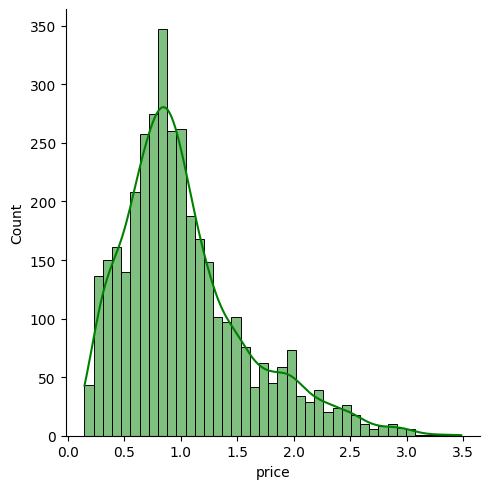

In [200]:
sns.displot(y_transformed, color='green', kde=True)

# Model Selection

In [201]:
columns_to_encode = ['F/H', 'floortype', 'luxury_type']

In [202]:
num_cols = ['area', 'bedRoom', 'bathroom', 'Servant Room', 'super_built_up_area', 'additional_room', 'balcony']
preprocessor = ColumnTransformer(
    transformers=[
        ('num' , StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop = 'first', handle_unknown='ignore'), ['sector', 'agePossession', 'furnish_type','F/H', 'floortype', 'luxury_type'])
    ],
    remainder='passthrough'
)

In [203]:
pipeline = Pipeline([
    ('preprocessor' , preprocessor),
    ('regressor' , SVR(kernel='rbf'))
])

In [204]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, x, y_transformed, cv=kfold, scoring='r2', error_score='raise')

In [205]:
print(scores.mean()), print(scores.std())

0.8808900174352209
0.017354446246834493


(None, None)

In [206]:
x_train, x_test, y_train, y_test = train_test_split(x, y_transformed, test_size=0.2, random_state=42)

In [207]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['area', 'bedRoom',
                                                   'bathroom', 'Servant Room',
                                                   'super_built_up_area',
                                                   'additional_room',
                                                   'balcony']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['sector', 'agePossession',
                                                   'furnish_type', 'F/H',
                                                   'floortype',
                                                   'luxury_type'])])),
                ('regressor', SVR())])

In [208]:
y_pred = pipeline.predict(x_test)
y_pred = np.expm1(y_pred)

In [209]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(np.expm1(y_test), y_pred)

0.9956148180423767

In [210]:
def scorer(model_name, model):

    output = []

    output.append(model_name)

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # K-fold cross-validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, x, y_transformed, cv=kfold, scoring='r2')

    output.append(scores.mean())

    x_train, x_test, y_train, y_test = train_test_split(x,y_transformed,test_size=0.2,random_state=42)

    pipeline.fit(x_train,y_train)

    y_pred = pipeline.predict(x_test)

    y_pred = np.expm1(y_pred)

    output.append(mean_absolute_error(np.expm1(y_test),y_pred))

    return output


In [211]:

model_dict = {
    'linear_reg':LinearRegression(),
    'svr':SVR(),
    'ridge':Ridge(),
    'decision tree': DecisionTreeRegressor(),
    'random forest':RandomForestRegressor(),
    'extra trees': ExtraTreesRegressor(),
    'gradient boosting': GradientBoostingRegressor(),
    'adaboost': AdaBoostRegressor(),
    'mlp': MLPRegressor(),
}

In [212]:
model_output = []
for model_name,model in model_dict.items():
  model_output.append(scorer(model_name, model))

In [213]:
model_df = pd.DataFrame(model_output, columns=['name','r2','mae']).sort_values(by='mae')

In [214]:
model_df

,name,r2,mae
8,mlp,0.872231,0.504519
1,svr,0.880890,0.515024
5,extra trees,0.883812,0.546911
4,random forest,0.874459,0.566673
6,gradient boosting,0.854139,0.612917
3,decision tree,0.775958,0.645926
0,linear_reg,0.830078,0.687877
2,ridge,0.829219,0.690573
7,adaboost,0.695261,0.854805


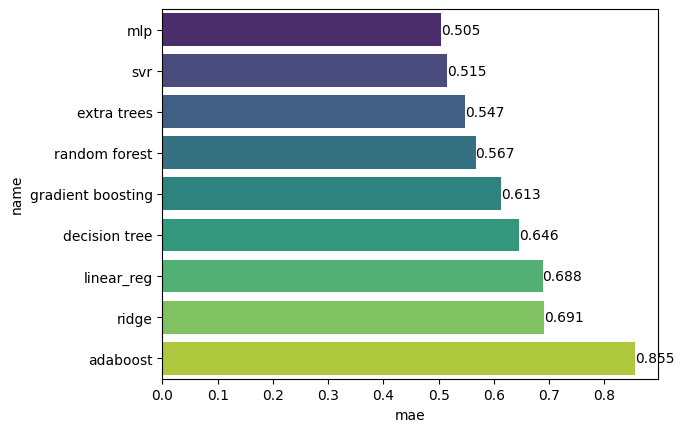

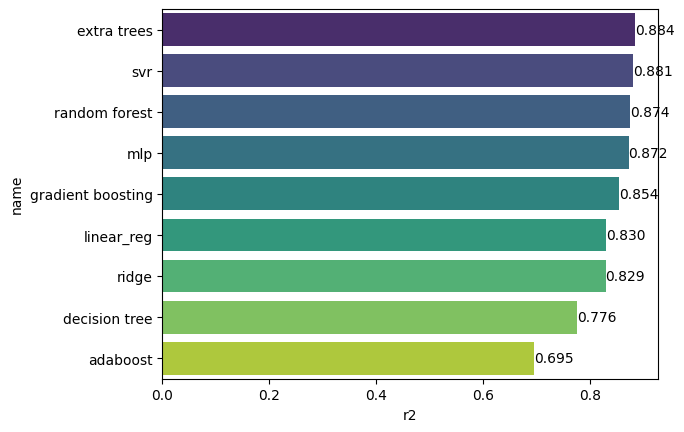

In [215]:
compare = model_df.copy()

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
plt.subplot()
compare = compare.sort_values(by="mae", ascending=True)
ax=sns.barplot(x="mae", y="name", data=compare, palette="viridis")
labels(ax)
plt.show()

plt.subplot()
compare = compare.sort_values(by="r2", ascending=False)
ax=sns.barplot(x="r2", y="name", data=compare, palette="viridis")
labels(ax)

plt.show()

# Summary

The model that best perfoms is SVM, with lowest mean abs error. Moreover the  variation in the target feature "price" is quiet high hence even if the MAE is around 50 lacs it is justified. RMSE wasn't used as the target has many outliers. 
Some ways to increase the performance are:
1. Getting more data
2. Using hyperparameter tuning
3. XGBoost with Bayesian optimization can help a lot